In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

df = pd.read_csv("Week7_train.csv")

df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df1=pd.read_csv("Week7_test.csv")

df1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df1.shape[0:]

(28000, 784)

In [4]:
# Step 4: Select only 10% of the data
df_sampled = df.sample(frac=0.1)
df.shape[0:]

(42000, 785)

In [5]:
# Step 5: Print the shape of the selected dataset
print("Shape of the sampled dataset:", df_sampled.shape)

Shape of the sampled dataset: (4200, 785)


In [6]:
# Step 6: Display the first 5 rows
print("First 5 rows of the dataset:")
print(df_sampled.head())

First 5 rows of the dataset:
       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
1341       4       0       0       0       0       0       0       0       0   
571        5       0       0       0       0       0       0       0       0   
28918      8       0       0       0       0       0       0       0       0   
36550      6       0       0       0       0       0       0       0       0   
9806       4       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
1341        0  ...         0         0         0         0         0   
571         0  ...         0         0         0         0         0   
28918       0  ...         0         0         0         0         0   
36550       0  ...         0         0         0         0         0   
9806        0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  

In [11]:
# Step 7: Find the number of unique class labels
unique_labels = df_sampled.iloc[:, -1].nunique()
#unique_labels = df_sampled.iloc[:, -1].value_counts().shape[0]
print("Number of unique class labels:", unique_labels)

Number of unique class labels: 1


In [12]:
# Step 8: Count the number of examples per class
print("Class distribution:")
print(df_sampled.iloc[:, -1].value_counts())

Class distribution:
pixel783
0    4200
Name: count, dtype: int64


In [13]:
# Step 9: Prepare X (features) and Y (target)
X = df_sampled.iloc[:, :-1].values  # All columns except last one (features)
y = df_sampled.iloc[:, -1].values   # Last column (target)

print(X.shape)


(4200, 784)


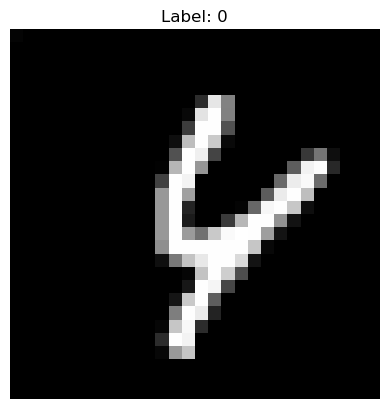

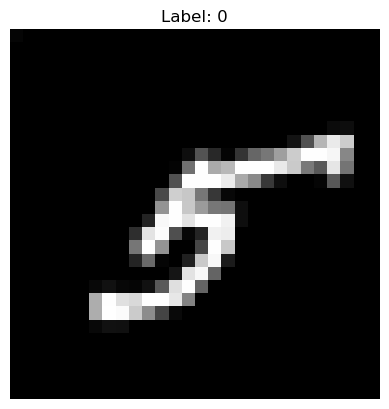

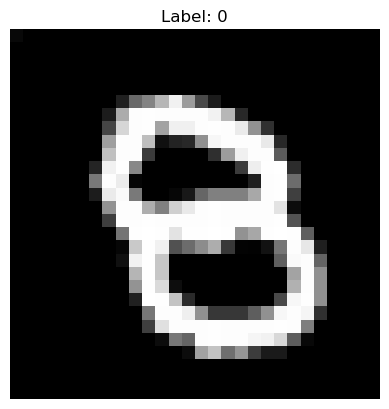

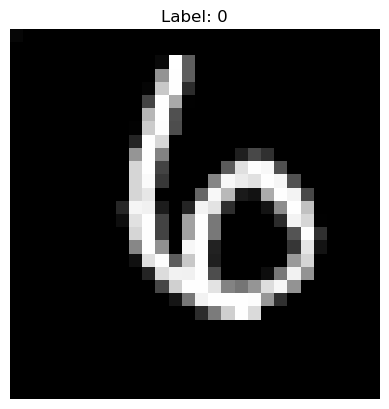

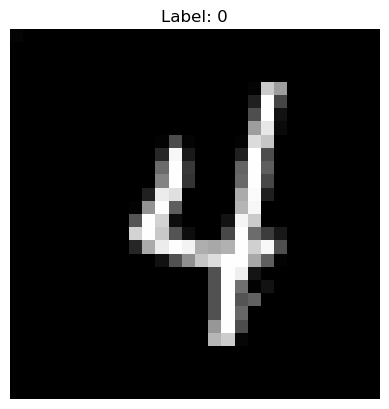

In [14]:
# Step 10: Visualize the first 5 images (Only if dataset has image data)

if X.shape[1] == 784:  # Checking if data has 784 features (for 28x28 images)
    for i in range(5):
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis("off")
        plt.show()


  

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 11: Split data into train (75%) and validation (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# Step 12: Fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
# Step 13: Predict validation set results
y_pred = knn.predict(X_test)

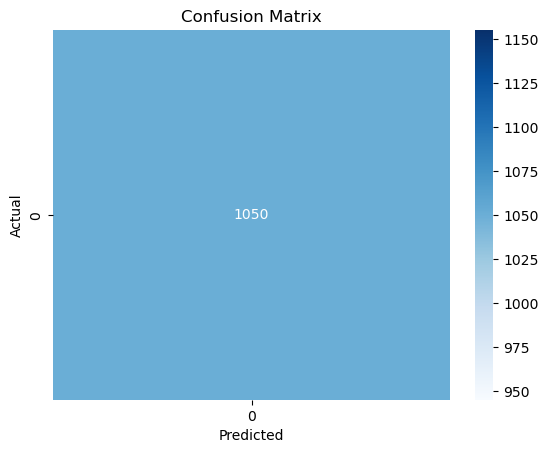

In [59]:
# Step 14: Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [52]:
# Step 15: Print the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050

    accuracy                           1.00      1050
   macro avg       1.00      1.00      1.00      1050
weighted avg       1.00      1.00      1.00      1050



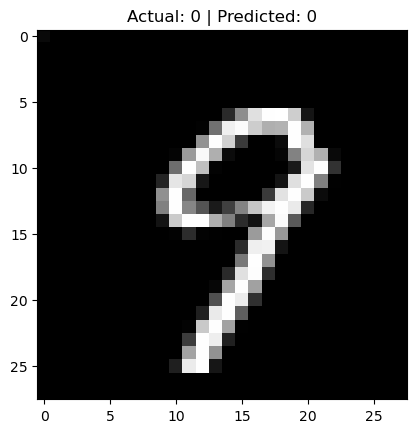

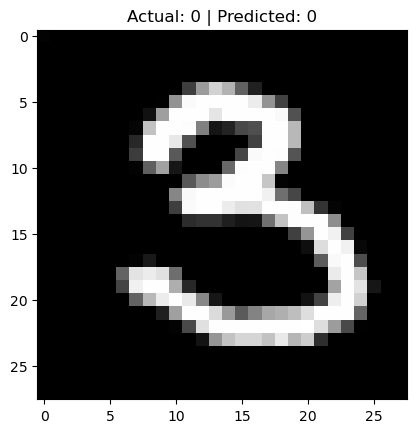

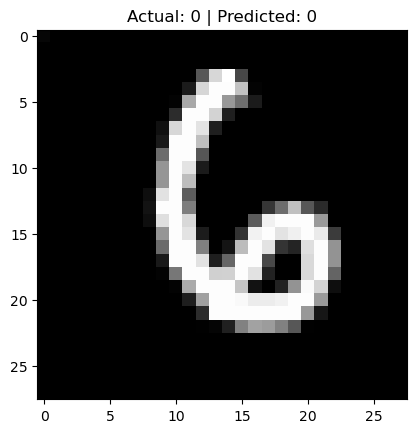

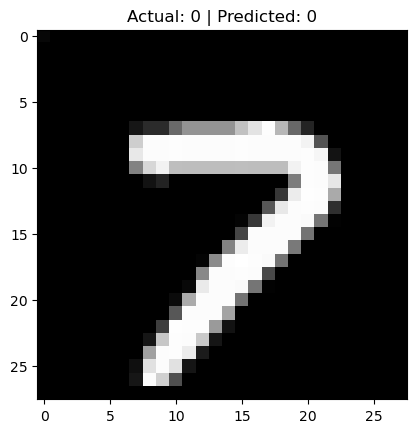

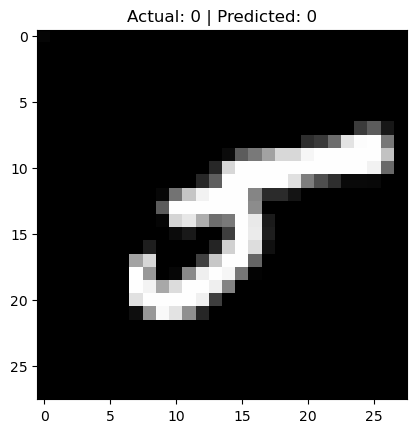

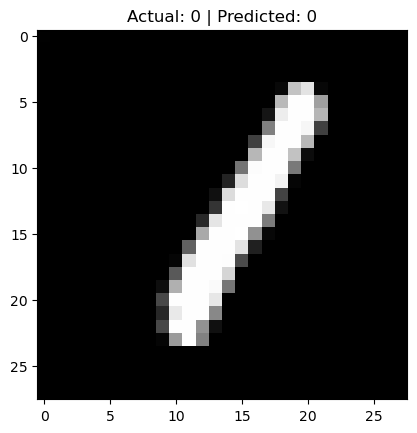

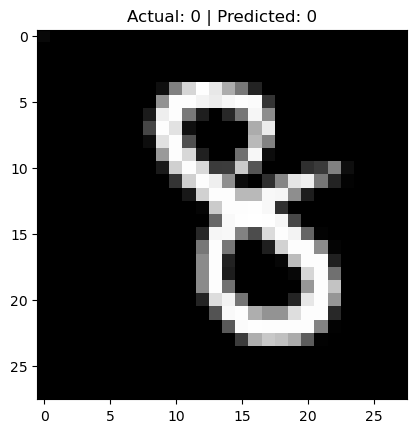

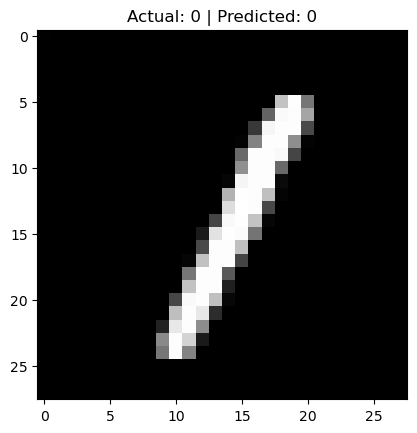

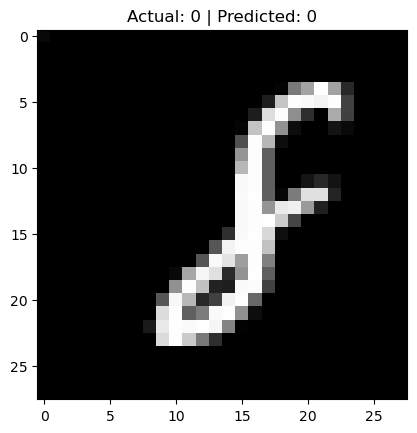

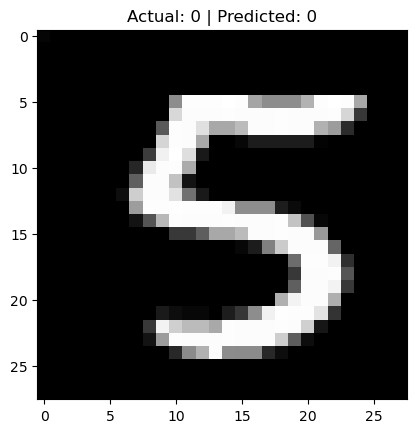

In [60]:
# Step 16: Visualize the first 5 test images with predictions
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Adjust shape as needed
    plt.title(f"Actual: {y_test[i]} | Predicted: {y_pred[i]}")
    plt.show()
    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.matrics import Classification_report

X=

